In [1]:
import pandas as pd
import git

In [3]:
repo = git.Repo(r'../../latenta/', odbt=git.GitCmdObjectDB)
repo

<git.repo.base.Repo '/home/wsaelens/projects/probabilistic-cell/latenta/.git'>

In [5]:
commits = pd.DataFrame(repo.iter_commits('devel'), columns=['raw'])
commits.head()

,raw
0,ed7cf2f652232871bdef6288adb33eef36fb89b8
1,cd11dc4d461ce130e33e23a21259caa14cf67632
2,2efb19ee920859225758cb0b872a8de807192d07
3,55e14a762dbde48cd8ad230de40c30305f6f7b70
4,6b7261e44bff20896f23799b309f31091295f73a


In [6]:
commits['author'] = commits['raw'].apply(lambda x: x.author.name)
commits.head()

,raw,author
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens
1,cd11dc4d461ce130e33e23a21259caa14cf67632,Wouter Saelens
2,2efb19ee920859225758cb0b872a8de807192d07,Wouter Saelens
3,55e14a762dbde48cd8ad230de40c30305f6f7b70,Wouter Saelens
4,6b7261e44bff20896f23799b309f31091295f73a,Wouter Saelens


In [7]:
commits['email'] = commits['raw'].apply(lambda x: x.author.email)
commits['committed_date'] = commits['raw'].apply(lambda x: pd.to_datetime(x.committed_datetime))
commits['message'] = commits['raw'].apply(lambda x: x.message)
commits['sha'] = commits['raw'].apply(lambda x: str(x))
commits.head(2).T

,0,1
raw,ed7cf2f652232871bdef6288adb33eef36fb89b8,cd11dc4d461ce130e33e23a21259caa14cf67632
author,Wouter Saelens,Wouter Saelens
email,wouter.saelens@gmail.com,wouter.saelens@gmail.com
committed_date,2021-08-27 17:38:58+02:00,2021-08-27 16:13:58+02:00
message,remove prints\n,update categorical\n
sha,ed7cf2f652232871bdef6288adb33eef36fb89b8,cd11dc4d461ce130e33e23a21259caa14cf67632


In [10]:
stats = pd.DataFrame(commits['raw'].apply(
    lambda x: pd.Series(x.stats.files)).stack()).reset_index(level=1)
stats = stats.rename(columns={ 'level_1' : 'filename', 0 : 'stats_modifications'})
stats.head()

/tmp/ipykernel_1653395/2736862140.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: pd.Series(x.stats.files)).stack()).reset_index(level=1)
/tmp/ipykernel_1653395/2736862140.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: pd.Series(x.stats.files)).stack()).reset_index(level=1)
/tmp/ipykernel_1653395/2736862140.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: pd.Series(x.stats.files)).stack()).reset_index(level=1)
/tmp/ipykernel_1653395/2736862140.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicit

,filename,stats_modifications
0,src/latenta/introspect/viz/component_graph.py,"{'insertions': 2, 'deletions': 2, 'lines': 4}"
0,src/latenta/links/vector/matmul.py,"{'insertions': 0, 'deletions': 1, 'lines': 1}"
0,src/latenta/posterior/vector/discrete/causal.py,"{'insertions': 5, 'deletions': 1, 'lines': 6}"
1,src/latenta/distributions/categorical.py,"{'insertions': 1, 'deletions': 0, 'lines': 1}"
1,src/latenta/variables/discrete/discrete.py,"{'insertions': 8, 'deletions': 11, 'lines': 19}"


In [11]:
stats_modifications = stats['stats_modifications'].apply(lambda x: pd.Series(x))
stats_modifications.head(7)

,insertions,deletions,lines
0,2,2,4
0,0,1,1
0,5,1,6
1,1,0,1
1,8,11,19
1,8,0,8
2,48,17,65


In [12]:
stats = stats.join(stats_modifications)
stats.head()

,filename,stats_modifications,insertions,deletions,lines
0,src/latenta/introspect/viz/component_graph.py,"{'insertions': 2, 'deletions': 2, 'lines': 4}",2,2,4
0,src/latenta/introspect/viz/component_graph.py,"{'insertions': 2, 'deletions': 2, 'lines': 4}",0,1,1
0,src/latenta/introspect/viz/component_graph.py,"{'insertions': 2, 'deletions': 2, 'lines': 4}",5,1,6
0,src/latenta/links/vector/matmul.py,"{'insertions': 0, 'deletions': 1, 'lines': 1}",2,2,4
0,src/latenta/links/vector/matmul.py,"{'insertions': 0, 'deletions': 1, 'lines': 1}",0,1,1


In [13]:
del(stats['stats_modifications'])
stats.head()

,filename,insertions,deletions,lines
0,src/latenta/introspect/viz/component_graph.py,2,2,4
0,src/latenta/introspect/viz/component_graph.py,0,1,1
0,src/latenta/introspect/viz/component_graph.py,5,1,6
0,src/latenta/links/vector/matmul.py,2,2,4
0,src/latenta/links/vector/matmul.py,0,1,1


In [14]:
commits = commits.join(stats)
commits.head(2).T

,0,0
raw,ed7cf2f652232871bdef6288adb33eef36fb89b8,ed7cf2f652232871bdef6288adb33eef36fb89b8
author,Wouter Saelens,Wouter Saelens
email,wouter.saelens@gmail.com,wouter.saelens@gmail.com
committed_date,2021-08-27 17:38:58+02:00,2021-08-27 17:38:58+02:00
message,remove prints\n,remove prints\n
sha,ed7cf2f652232871bdef6288adb33eef36fb89b8,ed7cf2f652232871bdef6288adb33eef36fb89b8
filename,src/latenta/introspect/viz/component_graph.py,src/latenta/introspect/viz/component_graph.py
insertions,2.0,0.0
deletions,2.0,1.0
lines,4.0,1.0


In [20]:
commits["committed_date"] = pd.to_datetime(commits["committed_date"], utc = True)

In [21]:
commits["committed_date"]

0     2021-08-27 15:38:58+00:00
0     2021-08-27 15:38:58+00:00
0     2021-08-27 15:38:58+00:00
0     2021-08-27 15:38:58+00:00
0     2021-08-27 15:38:58+00:00
                 ...           
834   2020-08-28 14:32:43+00:00
834   2020-08-28 14:32:43+00:00
834   2020-08-28 14:32:43+00:00
834   2020-08-28 14:32:43+00:00
834   2020-08-28 14:32:43+00:00
Name: committed_date, Length: 310589, dtype: datetime64[ns, UTC]

In [22]:
import seaborn as sns

/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='committed_date', ylabel='insertions'>

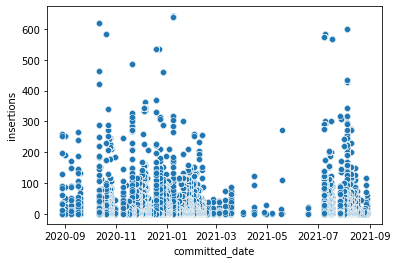

In [23]:
sns.scatterplot(commits["committed_date"], commits["Yinsertions"])

In [36]:
commits

,raw,author,email,committed_date,message,sha,filename,insertions,deletions,lines
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens,wouter.saelens@gmail.com,2021-08-27 15:38:58+00:00,remove prints\n,ed7cf2f652232871bdef6288adb33eef36fb89b8,src/latenta/introspect/viz/component_graph.py,2.0,2.0,4.0
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens,wouter.saelens@gmail.com,2021-08-27 15:38:58+00:00,remove prints\n,ed7cf2f652232871bdef6288adb33eef36fb89b8,src/latenta/introspect/viz/component_graph.py,0.0,1.0,1.0
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens,wouter.saelens@gmail.com,2021-08-27 15:38:58+00:00,remove prints\n,ed7cf2f652232871bdef6288adb33eef36fb89b8,src/latenta/introspect/viz/component_graph.py,5.0,1.0,6.0
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens,wouter.saelens@gmail.com,2021-08-27 15:38:58+00:00,remove prints\n,ed7cf2f652232871bdef6288adb33eef36fb89b8,src/latenta/links/vector/matmul.py,2.0,2.0,4.0
0,ed7cf2f652232871bdef6288adb33eef36fb89b8,Wouter Saelens,wouter.saelens@gmail.com,2021-08-27 15:38:58+00:00,remove prints\n,ed7cf2f652232871bdef6288adb33eef36fb89b8,src/latenta/links/vector/matmul.py,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
834,bb2360d790e78f9522038e3d8221d5eaa0c76823,Wouter Saelens,wouter.saelens@gmail.com,2020-08-28 14:32:43+00:00,initial\n,bb2360d790e78f9522038e3d8221d5eaa0c76823,src/designercells/cellmodels/onoff.py,83.0,0.0,83.0
834,bb2360d790e78f9522038e3d8221d5eaa0c76823,Wouter Saelens,wouter.saelens@gmail.com,2020-08-28 14:32:43+00:00,initial\n,bb2360d790e78f9522038e3d8221d5eaa0c76823,src/designercells/cellmodels/onoff.py,1.0,0.0,1.0
834,bb2360d790e78f9522038e3d8221d5eaa0c76823,Wouter Saelens,wouter.saelens@gmail.com,2020-08-28 14:32:43+00:00,initial\n,bb2360d790e78f9522038e3d8221d5eaa0c76823,src/designercells/cellmodels/onoff.py,14.0,0.0,14.0
834,bb2360d790e78f9522038e3d8221d5eaa0c76823,Wouter Saelens,wouter.saelens@gmail.com,2020-08-28 14:32:43+00:00,initial\n,bb2360d790e78f9522038e3d8221d5eaa0c76823,src/designercells/cellmodels/onoff.py,63.0,0.0,63.0


In [39]:
commits.rolling(window=10, on = "committed_date")["lines"].sum()

0         NaN
0         NaN
0         NaN
0         NaN
0         NaN
        ...  
834     868.0
834     866.0
834     848.0
834     908.0
834    1093.0
Name: lines, Length: 310589, dtype: float64

In [43]:
import datetime as datetime

In [70]:
commits["week"] = commits["committed_date"].dt.isocalendar().week
commits["year"] = commits["committed_date"].dt.isocalendar().year

In [71]:
week_summary = commits.groupby(["year", "week"]).sum()

In [77]:
week_summary

insertions  deletions      lines
year week                                  
2020 35       17700.0        0.0    17700.0
     36       10492.0     3981.0    14473.0
     37       15680.0     5540.0    21220.0
     38       48121.0    11592.0    59713.0
     41      211788.0   139920.0   351708.0
     42       21556.0     8046.0    29602.0
     43      243968.0    65498.0   309466.0
     44       56370.0    46642.0   103012.0
     46       25945.0    12468.0    38413.0
     47      562581.0   250070.0   812651.0
     48      227953.0   443826.0   671779.0
     49      448229.0   374220.0   822449.0
     50       13408.0    10219.0    23627.0
     51      564324.0   426843.0   991167.0
     52      978250.0  2167798.0  3146048.0
     53       25381.0    13139.0    38520.0
2021 1      1292405.0  2007428.0  3299833.0
     2        17654.0    22847.0    40501.0
     3       223091.0   214493.0   437584.0
     4       172179.0   146795.0   318974.0
     5        84232.0    67576.0   151808.0
     6        71056.0    31961.0   103017.0
     7          560.0      193.0      753.0
     8          183.0       57.0      240.0
     9          704.0      147.0      851.0
     10         590.0      598.0     1188.0
     11       57533.0    22942.0    80475.0
     13           7.0        2.0        9.0
     15       10877.0     4536.0    15413.0
     17         101.0       15.0      116.0
     18           4.0        1.0        5.0
     20         665.0      108.0      773.0
     24         215.0      160.0      375.0
     27      822346.0   585440.0  1407786.0
     28      181296.0   112987.0   294283.0
     30       27374.0    17119.0    44493.0
     31     1124829.0   659613.0  1784442.0
     32      367032.0   202733.0   569765.0
     33        3174.0     1860.0     5034.0
     34        2275.0      478.0     2753.0

In [78]:
import matplotlib as mpl

In [80]:
import matplotlib.pyplot as plt

In [106]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def render_latex(formula, fontsize=12, dpi=300, format_='svg'):
    """Renders LaTeX formula into image.
    """
    fig = plt.figure(figsize=(0.01, 0.01))
    fig.text(0, 0, u'${}$'.format(formula), fontsize=fontsize, color = "red")
    buffer_ = BytesIO()
    fig.savefig(buffer_, dpi=dpi, transparent=True, format=format_, bbox_inches='tight', pad_inches=0.0)
    print(fig.get_size_inches()*fig.dpi)
    plt.close(fig)
    return buffer_.getvalue()

image_bytes = render_latex(
    r'\theta=\theta+C(1+\theta-\beta)\sqrt{1-\theta}succ_{mul}',
    fontsize=10, dpi=200, format_='png')
encoding = base64.b64encode(image_bytes)

from IPython.display import HTML

HTML(f"<img src='data:image/png;base64, {encoding.decode('utf-8')}'>")

[0.72 0.72]


In [95]:
f"<img src='data:image/png;base64,{encoding}'>"

"<img src='data:image/png;base64,b'iVBORw0KGgoAAAANSUhEUgAAAckAAAApCAYAAABeDNJHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAB7CAAAewgFu0HU+AAAP30lEQVR4nO2de9hVVZnAfy/XJMDrAEmCMxEQXuagqSlhoSNeCnVMcmrAoJxxaorH6cnxUmZCY2NOluM4ldnweZmLjuKgDtU0PWJhXlJg0jQhFElSiwAFFBB45493bfb6ztl7n805+3znsL/1e571rLX3uuy1zn7Pfve6vVtUlUAgEAgEArX0aXcFAoFAIBDoVIKSDAQCgUAghaAkA4FA6xC5CpET212NQKBRJMxJBgKBliGyEhjT7mrslahKu6sQgH7trkAgECgpIhOBlai+s91VCQQaJQy3BgKBVnEmcG+7KxEINENQkoFAoFVMA+5rdyUCgWYISjIQCBSPyEgAVNe2uSaBQFMEJRkIBFrBmYReZKAEBCUZCARawTTCfGSgBNRXkiLHIjIfkecR2YrIrxG5DZF39UD9iqVMbSkCkQGIrEREETm33dVpC2WSCZEjEbkJkRWIvI7IG4g8h0gXIocnpL/R3ftbCq7HW4ExqC4rtNy9jTLJVm9GVZMd9FX4usIuBU1wrylMSs3fSa5MbenerncofE7hfxVWKLyqsFVhrcL3FC5WGJGR/2LX/ifV7ZlNSDNM4YMKc12Z67zfravtv0GQiag9lyjsSGmLKrxe0x4YpbDN/QZHF1iXcxRuzJEuyFZwHe/SbnIfhdu9m3qrwqkKxytcrbDTnV+pMLDdjch0ZWpL3KaDFe7KeCD67k2F6xQGV5UxxHsonZdxrayyu9r+WwSZQOETXluedsfvVjjZ3fuoPQ8m5L3JxS0qsD5dCqfmSJcmVxpkK7hOcWk3+jJ3I

<AxesSubplot:xlabel='year,week'>

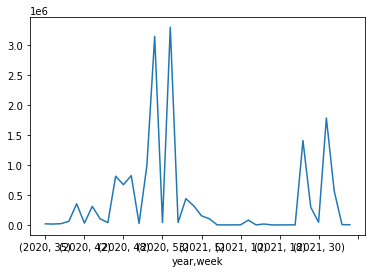

In [75]:
week_summary["lines"].plot()

KeyboardInterrupt: 

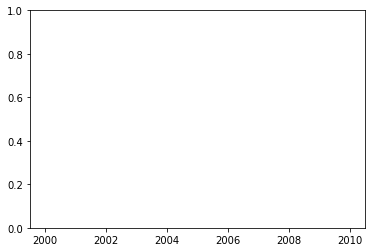

In [29]:
sns.histplot(x = commits["committed_date"], y = commits["lines"])